# TME Intelligence artificielle pour la robotique
# Comparaison between BBRL TD3 and SB3 TD3

* Étudiant 1: **CHAMOUN Joe 21312860**
* Étudiant 2: **GHENAIET Walid 21307720**


In [55]:
from scipy import stats
import pickle
import numpy as np
import torch
import matplotlib.pyplot as plt

## Loading rewards

In [56]:
def mean_rewards(rewards):
  # trim them to be of same size
  min_length = min(len(seed_rewards) for seed_rewards in rewards)
  trimmed_rewards = [seed_rewards[:min_length] for seed_rewards in rewards]
  rewards = np.array(trimmed_rewards)


  return np.mean(rewards, axis=1)

In [60]:
from pathlib import PureWindowsPath
seeds = [1, 42, 123, 234, 345, 456, 567, 678, 789, 890]

# SB3
sb3_rewards = []
for seed in seeds:
  with open(f'/content/sb3/td3_lunarlander_seed_{seed}_rewards.pkl', 'rb') as f:
    loaded_rewards = pickle.load(f)

  sb3_rewards.append(loaded_rewards)

mean_sb3_rewards = mean_rewards(sb3_rewards)
print(f"{mean_sb3_rewards=}")

# BBRL
with open('/content/bbrl/all_rewards.pkl', 'rb') as f:
    loaded_bbrl_rewards = pickle.load(f)

bbrl_rewards = []
for rewards in loaded_bbrl_rewards:
  bbrl_rewards.append(torch.sum(rewards, dim=1).tolist())

mean_bbrl_rewards = mean_rewards(bbrl_rewards)
print(f"{mean_bbrl_rewards=}")

mean_sb3_rewards=array([-255.9296564 , -263.10120034, -583.31855683, -173.13951889,
       -123.00513803, -392.97299656, -258.66292297, -258.83139129,
       -347.49262105, -358.97160249])
mean_bbrl_rewards=array([-1755.52786739, -1950.64827172, -1526.71131737, -1645.79872461,
       -1235.1716703 , -1941.81501523, -1945.91030141, -1794.34107353,
       -1535.6124746 , -1115.28061614])


## Reward curves

In [69]:
def draw_rewards_learning_curve(rewards,library=""):
  min_length = min(len(seed_rewards) for seed_rewards in rewards)

  trimmed_rewards = [seed_rewards[:min_length] for seed_rewards in rewards]

  rewards_array = np.array(trimmed_rewards)

  mean_rewards = np.mean(rewards_array, axis=0)
  std_rewards = np.std(rewards_array, axis=0)

  plt.figure(figsize=(10, 6))
  plt.plot(mean_rewards, label='Mean Episode Reward', color='b')
  plt.fill_between(range(len(mean_rewards)),
                  mean_rewards - std_rewards,
                  mean_rewards + std_rewards,
                  color='b', alpha=0.2, label='Std Dev')
  plt.xlabel('Episode')
  plt.ylabel('Reward')
  plt.title(f'Learning Curve: {library} TD3 on LunarLanderContinuous-v2 (10 Seeds)')
  plt.legend()
  plt.grid(True)
  plt.show()


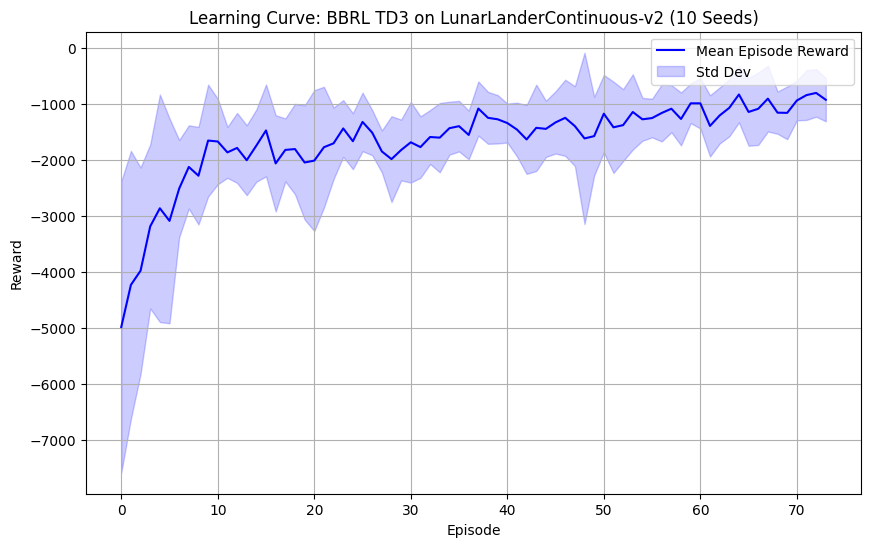

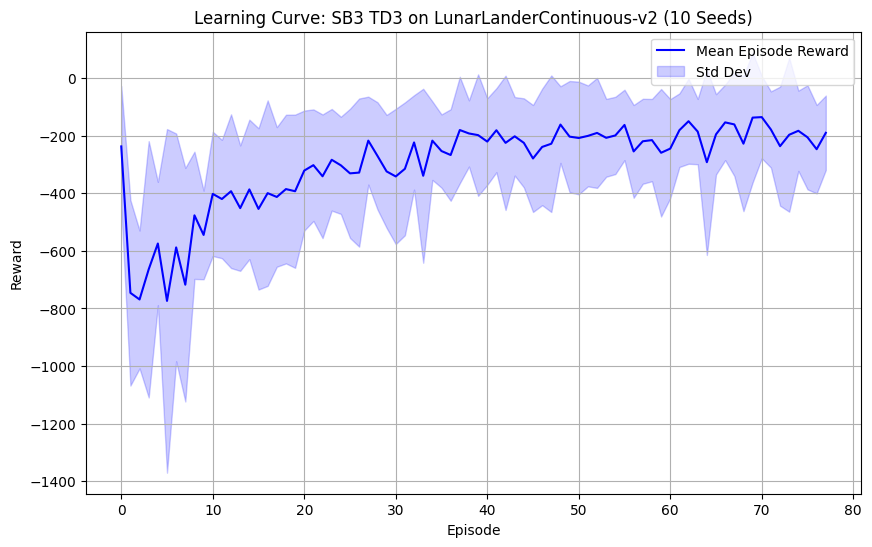

In [70]:
draw_rewards_learning_curve(bbrl_rewards,"BBRL")
draw_rewards_learning_curve(sb3_rewards,"SB3")

## Mean seed rewards per episode

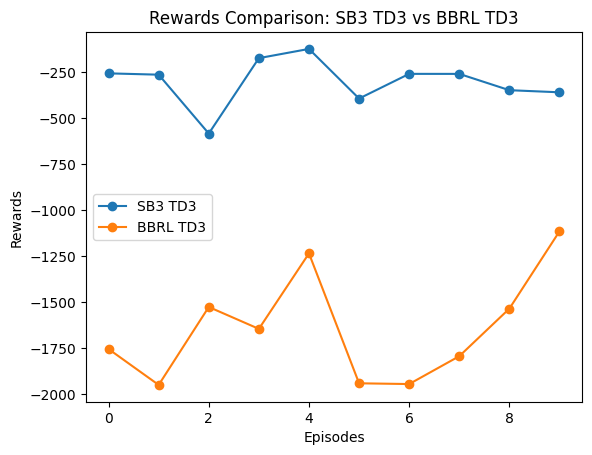

In [61]:
plt.plot(mean_sb3_rewards, label="SB3 TD3", marker='o')
plt.plot(mean_bbrl_rewards, label="BBRL TD3", marker='o')
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('Rewards Comparison: SB3 TD3 vs BBRL TD3')
plt.legend()
plt.show()

## Performing a paired t-test

In [59]:

t_statistic, p_value = stats.ttest_rel(sb3_rewards, bbrl_rewards)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Significant difference between SB3 TD3 and BBRL TD3.")
else:
    print("No significant difference between SB3 TD3 and BBRL TD3.")

T-statistic: 13.148468285793278
P-value: 3.52207716345438e-07
Significant difference between SB3 TD3 and BBRL TD3.
